# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**The dataset collected is related to 17 campaigns that occurred between May 2008 and Nov 2010**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [13]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
df.duplicated().sum()

12

In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.shape

(41176, 21)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
bank = df.copy()

In [6]:
bank = bank.iloc[:,0:7]
bank.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [7]:
job = pd.get_dummies(bank["job"])
marital = pd.get_dummies(bank["marital"])
education = pd.get_dummies(bank["education"])
default = pd.get_dummies(bank["default"])
housing = pd.get_dummies(bank["housing"])
loan = pd.get_dummies(bank["loan"])

In [8]:
column7_df = pd.concat([bank["age"], job, marital, education, default, housing, loan], axis = 1)
column7_df.shape

(41176, 34)

In [9]:
X = column7_df.to_numpy()
y = df["y"].to_numpy()

In [10]:
# Scale the dataframe since the age column is different from the other 0 and 1
scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [11]:
X = scale.transform(X)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(30882, 34)

(30882,)

(10294, 34)

(10294,)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

**our baseline is 0.5, our classifier should aim to beat this baseline**

$\sigma(\bar{x}) = \Large\frac{1}{1 + e^{-z}}$   

while z = 0   
$e^{0} = 1$   

$\sigma(\bar{x}) = \Large\frac{1}{1 + e^{-z}} = 0.5$ 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
model = LogisticRegression()
model

LogisticRegression()

In [15]:
t0 = time.time()
model.fit(X_train, y_train)
print("Traning time:", time.time()-t0)

Traning time: 0.08342599868774414


In [16]:
pred = model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [42]:
score = model.score(X_train, y_train)
print("The training accuracy is:",score)
accuracy = accuracy_score(y_test, pred)
print("The accuracy score of this model is:", accuracy)

The training accuracy is: 0.8879606243118969
The accuracy score of this model is: 0.8855644064503594


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
| LR    |0.056    |.887     |.885     |
| knn    |0.020    |.879     |.815     |
| DTree    |0.112    |.917     |.862     |
| SVM    |24.35    |.888     |.885     |

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [46]:
t0 = time.time()
knn.fit(X_train, y_train)
print("Traning time:", time.time()-t0)

Traning time: 0.02040696144104004


In [47]:
pred = knn.predict(X_test)
score =knn.score(X_train, y_train)
print("The training accuracy is:",score)
accuracy = accuracy_score(y_test, pred)
print("The accuracy score of this model is:", accuracy)

The training accuracy is: 0.8799948189884075
The accuracy score of this model is: 0.8145521663104721


In [49]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [50]:
t0 = time.time()
tree.fit(X_train, y_train)
print("Traning time:", time.time()-t0)

Traning time: 0.11249208450317383


In [51]:
pred = tree.predict(X_test)
score =tree.score(X_train, y_train)
print("The training accuracy is:",score)
accuracy = accuracy_score(y_test, pred)
print("The accuracy score of this model is:", accuracy)

The training accuracy is: 0.917880966258662
The accuracy score of this model is: 0.8620555663493297


In [53]:
clf = svm.SVC()
clf

SVC()

In [54]:
t0 = time.time()
clf.fit(X_train, y_train)
print("Traning time:", time.time()-t0)

Traning time: 24.350856065750122


In [55]:
pred = clf.predict(X_test)
score =clf.score(X_train, y_train)
print("The training accuracy is:",score)
accuracy = accuracy_score(y_test, pred)
print("The accuracy score of this model is:", accuracy)

The training accuracy is: 0.8884787254711483
The accuracy score of this model is: 0.885175830580921


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [59]:
# There is no gender in the dataset, at this point I couldn't test the gender value because there is no evidence 
# gender has high related to the y

In [17]:
# testing hyperparameter for KNN
# use the default n_neighbour = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [18]:
mat = confusion_matrix(y_test, pred)
mat

array([[8115, 1004],
       [ 949,  226]])

In [68]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

          no       0.89      0.90      0.90      9117
         yes       0.17      0.16      0.17      1177

    accuracy                           0.81     10294
   macro avg       0.53      0.53      0.53     10294
weighted avg       0.81      0.81      0.81     10294



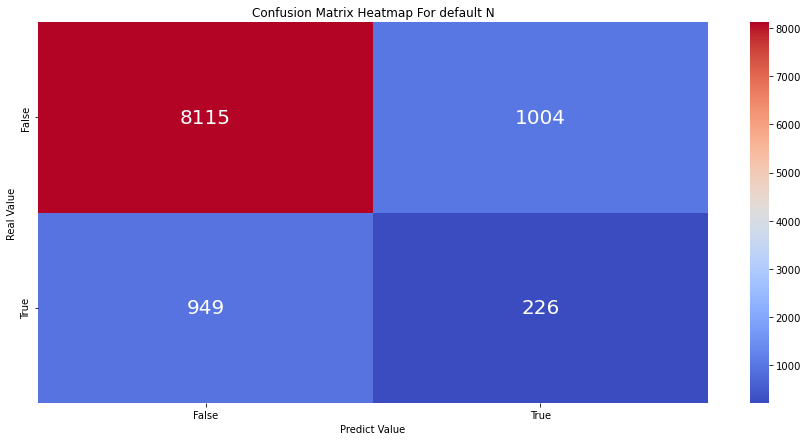

In [20]:
plt.figure(figsize = (15,7))
ax = sns.heatmap(mat, annot = True, fmt = "d", cmap = "coolwarm", annot_kws={"size":20} )
plt.xticks([0.5,1.5], ["False","True"])
plt.yticks([0.5,1.5], ["False","True"])
plt.xlabel("Predict Value")
plt.ylabel("Real Value")
plt.title("Confusion Matrix Heatmap For default N")
plt.show()

In [85]:
# Find the best K value, only test the first 500 because this takes me more than 2 hours 
# to run the len(df) for at CPU rate 797%
param_to_try = {"n_neighbors": np.array(range(1, 500))}
model_finder = GridSearchCV(estimator = knn, param_grid = param_to_try, scoring = "accuracy")

In [86]:
model_finder.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,...
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499])},
             scoring='accuracy')

In [87]:
model_finder.best_estimator_

KNeighborsClassifier(n_neighbors=50)

In [21]:
#testing hyperparameter of 50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [22]:
mat = confusion_matrix(y_test, pred)
mat

array([[9099,   20],
       [1162,   13]])

In [90]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      9117
         yes       0.62      0.00      0.01      1177

    accuracy                           0.89     10294
   macro avg       0.76      0.50      0.47     10294
weighted avg       0.86      0.89      0.83     10294



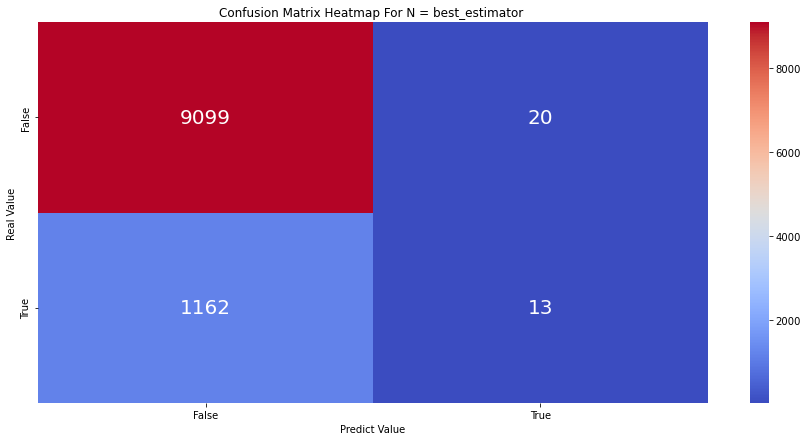

In [23]:
plt.figure(figsize = (15,7))
ax = sns.heatmap(mat, annot = True, fmt = "d", cmap = "coolwarm", annot_kws={"size":20} )
plt.xticks([0.5,1.5], ["False","True"])
plt.yticks([0.5,1.5], ["False","True"])
plt.xlabel("Predict Value")
plt.ylabel("Real Value")
plt.title("Confusion Matrix Heatmap For N = best_estimator ")
plt.show()

##### Questions